In [64]:
import requests
import re
from bs4 import BeautifulSoup

#word=input("Enter Category:")
#url="https://www.amazon.com/s/ref=nav_shopall-export_nav_mw_sbd_intl_computers?keywords=imac"
#url="https://www.amazon.com/s/ref=nb_sb_noss_1?url=search-alias%3Daps&field-keywords=computers"
url="https://www.amazon.com/s?k=computers&ref=nb_sb_noss"
#url="https://www.amazon.com/s?i=aps&k=computers&ref=nb_sb_noss&url=search-alias%3Daps"
cont=requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'})
soup=BeautifulSoup(cont.content,'html.parser')
#pattern=re.compile(r"http://www.amazon.com/.*/dp/(.*?)\"")
#re.findall(pattern,soup.find('a'))

filename="amazon_prod_visual.csv"
f=open(filename,"w",encoding="utf-8")
headers="Asian# Name# Price# Reviews"
f.write(headers+"\n")
#pattern=re.compile(r"sg-col-20-of-24 s-result-item sg-col-0-of-12 sg-col-28-of-32 sg-col-16-of-20 sg-col sg-col-32-of-36 sg-col-12-of-16 sg-col-24-of-28")
pattern=re.compile(r"sg-col-20-of-24 s-result-item sg-col-0-of-12 sg-col-28-of-32 sg-col-16-of-20 sg-col sg-col-32-of-36 sg-col-12-of-16 sg-col-24-of-28")
sp=soup.findAll("div",{"class":pattern.findall("sg-col-20-of-24 s-result-item sg-col-0-of-12 sg-col-28-of-32 sg-col-16-of-20 sg-col sg-col-32-of-36 sg-col-12-of-16 sg-col-24-of-28")})
print("Sponsored Container:",len(sp))

for container in sp:
    asin=(container["data-asin"])
    print(asin)
    try:
        pat_title=re.compile(r"a-size-medium a-color-base a-text-normal")
        title_container=container.findAll("span", {"class":pat_title.findall("a-size-medium a-color-base a-text-normal")})
        name = title_container[0].text
        print(name)
    except:
        name="N/A"
    price_container= container.findAll("span", {"class":"a-offscreen"})
    try:
        price = price_container[0].text
    except:
        price="N/A"
    print(price)
    review_container=container.findAll("span",{"class":"a-icon-alt"})
    try:
        review=review_container[0].text
    except:
        review="0"
    f.write(asin+'#'+name+'#'+price+'#'+review+"\n")
f.close()

Sponsored Container: 16
B07CY79CKZ
Acer Aspire C24-865-ACi5NT AIO Desktop, 23.8" Full HD, 8th Gen Intel Core i5-8250U, 12GB DDR4, 1TB HDD, 802.11ac WiFi, Wireless Keyboard and Mouse, Windows 10 Home
$599.99
B01JSDKGOO
2019 HP 23.8" FHD Touchscreen IPS-WLED Backlit Micro Edge Display AIO Desktop Computer, 7th Gen AMD A9-9425 Up to 3.7GHz, 8GB DDR4 RAM, 1TB HDD, 802.11AC Wifi, Bluetooth 4.2, HDMI, USB 3.0, Windows 10
$561.99
B079TGL2BZ
Acer Aspire E 15, 15.6" Full HD, 8th Gen Intel Core i3-8130U, 6GB RAM Memory, 1TB HDD, 8X DVD, E5-576-392H
$329.99
B07C3PMNV2
HP 20-inch All-in-One Computer, Intel Celeron J4005, 4GB RAM, 1TB Hard Drive, Windows 10 (20-c410, White)
N/A
B0757FV6Y4
CYBERPOWERPC Gamer Xtreme VR GXiVR8100A Gaming PC (Intel i7-8700 3.2GHz, 16GB DDR4, NVIDIA GeForce GTX 1060 3GB, 120GB SSD+1TB HDD & Win10 Home) Black
$999.99
B01MDUH6HX
Premium High Performance RCA Galileo Pro 11.5" 32GB Touchscreen Tablet Computer with Keyboard Case Quad-Core 1.3Ghz Processor 1G Memory 32GB HDD 

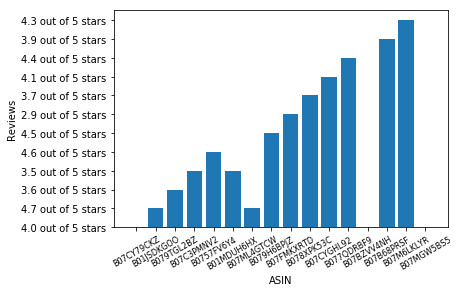

In [79]:
import matplotlib.pyplot as plt
import csv

file_name="amazon_prod_visual.csv"
data=open(file_name,"rt")
reader=csv.reader(data,delimiter='#')
X=list(reader)

x_val=[]
y_val=[]
for x in range(1,len(X)):
    x_val.append(X[x][0])
    y_val.append(X[x][3])

plt.bar(x_val,y_val)
plt.xlabel("ASIN")
plt.ylabel("Reviews")
plt.xticks(x_val,fontsize=8,rotation=30)
plt.show()